In [251]:
#Neslihan Çekiç
#150160060
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
#import any other non-machine learning modules that you wish
#SHORTCUTS: Alt + Enter includes new cell below, CTRL + Enter executes the current cell
##########################
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 

# Part A: Examine training sets

### 1-) Importing training sets

In [252]:
#PART A: Examine training sets here. plots etc.
#Hint: df1_class0 = df1[df1['column_name']==0] creates a new dataframe and includes samples (rows) whose class values are 0
#hint: for data distribution plots use plt.scatter(x-axis,y-axis,other params. check online)
#Hint: for each new plot use plt.figure() so they won't overlap, one on top of another
#-------
df1_class0 = pd.DataFrame(df1[df1['y'] == 0], columns=['x1','x2']) 
df1_class1 = pd.DataFrame(df1[df1['y'] == 1], columns=['x1','x2']) 

df2_class0 = pd.DataFrame(df2[df2['y'] == 0], columns=['x1','x2']) 
df2_class1 = pd.DataFrame(df2[df2['y'] == 1], columns=['x1','x2']) 


### 2-) Covariance Matrix

[Text(0, 0, ''), Text(0, 0, 'x1'), Text(0, 0, 'x2')]

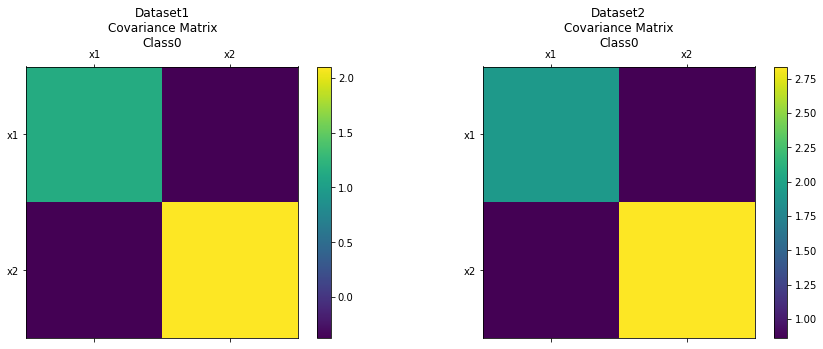

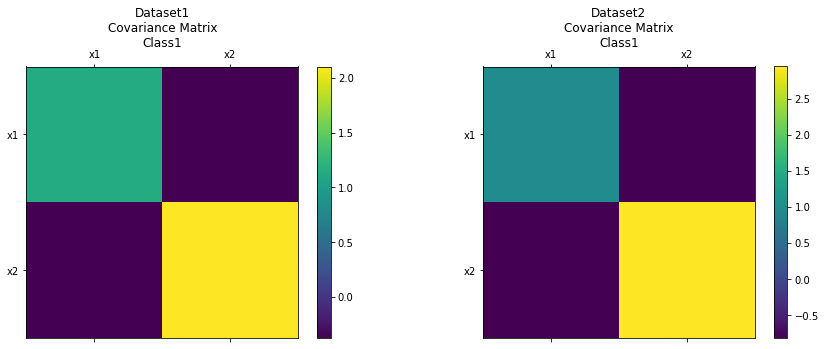

In [254]:
df1_cov_mtrx0 = np.cov(np.transpose(df1_class0))
df1_cov_mtrx1 = np.cov(np.transpose(df1_class1))

df2_cov_mtrx0 = np.cov(np.transpose(df2_class0)) 
df2_cov_mtrx1 = np.cov(np.transpose(df2_class1))

alpha = ['x1', 'x2']
fig = plt.figure(figsize=(15,5))

ax1_0 = fig.add_subplot(121)
ax1_0.set_title("Dataset1\nCovariance Matrix\nClass0")
cax = ax1_0.matshow(df1_cov_mtrx0,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax1_0.set_xticklabels(['']+alpha)
ax1_0.set_yticklabels(['']+alpha)

ax2_0 = fig.add_subplot(122)
ax2_0.set_title("Dataset2\nCovariance Matrix\nClass0")
cax = ax2_0.matshow(df2_cov_mtrx0,interpolation='nearest') #cov. matrix of dataset2
fig.colorbar(cax)
ax2_0.set_xticklabels(['']+alpha)
ax2_0.set_yticklabels(['']+alpha)

#to plot cov. matrices you may use following code: (compute 'cov_mtrx' by yourself)
fig = plt.figure(figsize=(15,5))

ax1_1 = fig.add_subplot(121)
ax1_1.set_title("Dataset1\nCovariance Matrix\nClass1")
cax = ax1_1.matshow(df1_cov_mtrx1,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax1_1.set_xticklabels(['']+alpha)
ax1_1.set_yticklabels(['']+alpha)

ax2_1 = fig.add_subplot(122)
ax2_1.set_title("Dataset2\nCovariance Matrix\nClass1")
cax = ax2_1.matshow(df2_cov_mtrx1,interpolation='nearest') #cov. matrix of dataset2
fig.colorbar(cax)
ax2_1.set_xticklabels(['']+alpha)
ax2_1.set_yticklabels(['']+alpha)

#---------
#for the histogram plots use plt.hist() (Remember: 4 of them we want)
#for title use: plt.gca().set(title='Data distribution of feature x of trainingSet y', ylabel='Frequency')

### Interpretation of Covariance Matrix

      If we evaluate dataset 1, we see that the covariance matrixes of the 2 classes are the same, this enters the special case in the bayes classifier (different mean, same covariance matrix). In addition, since features in class 0 and class 1 have negative covariance, feature 1 and feature 2 show inversely proportional distribution (If feature 1 increases, feature 2 decreases).
      
      
    When we examine dataset 2, there is no equality between covariance matrixes, so it should enter the general case in the bayes classifier. In addition, features for class 0 have positive covariance, while class 1 features have negative covariance.
      

### 3-) Overlaid Transparent Histograms

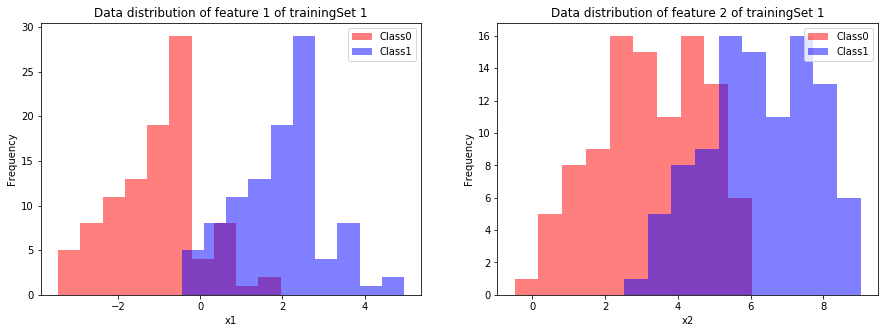

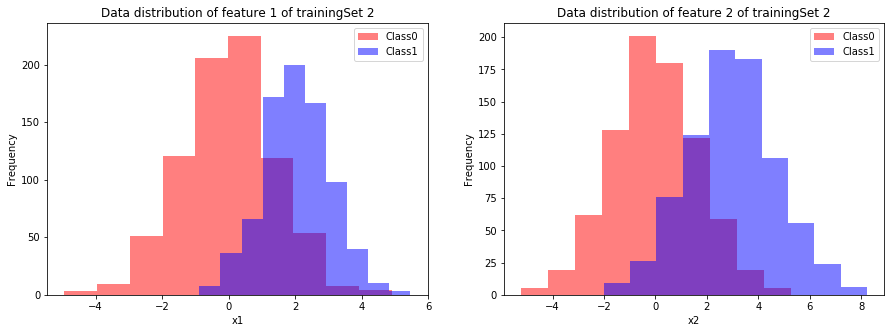

In [255]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.hist(df1_class0['x1'], alpha=0.5,  label='Class0', color='r')
ax1.hist(df1_class1['x1'], alpha=0.5, label='Class1', color='b')
plt.gca().set(title='Data distribution of feature 1 of trainingSet 1', ylabel='Frequency', xlabel='x1')
ax1.legend(loc='upper right')

ax2 = fig.add_subplot(122)
ax2.hist(df1_class0['x2'], alpha=0.5, label='Class0', color='r')
ax2.hist(df1_class1['x2'], alpha=0.5, label='Class1', color='b')
plt.gca().set(title='Data distribution of feature 2 of trainingSet 1', ylabel='Frequency', xlabel='x2')
ax2.legend(loc='upper right')

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.hist(df2_class0['x1'], alpha=0.5, label='Class0', color='r')
ax1.hist(df2_class1['x1'], alpha=0.5,  label='Class1', color='b')
plt.gca().set(title='Data distribution of feature 1 of trainingSet 2', ylabel='Frequency', xlabel='x1')
ax1.legend(loc='upper right')

ax2 = fig.add_subplot(122)
ax2.hist(df2_class0['x2'], alpha=0.5, label='Class0', color='r')
ax2.hist(df2_class1['x2'], alpha=0.5,  label='Class1', color='b')
plt.gca().set(title='Data distribution of feature 2 of trainingSet 2', ylabel='Frequency', xlabel='x2')
ax2.legend(loc='upper right')

### Interpretation of Histograms

    When we look at the histograms, we observe that the features have intersections, and we can predict that the new test samples falling into these parts may be misclassified. We can also observe that each feature resembles a Gaussian distribution.

### 4-) Plotting Training Datasets

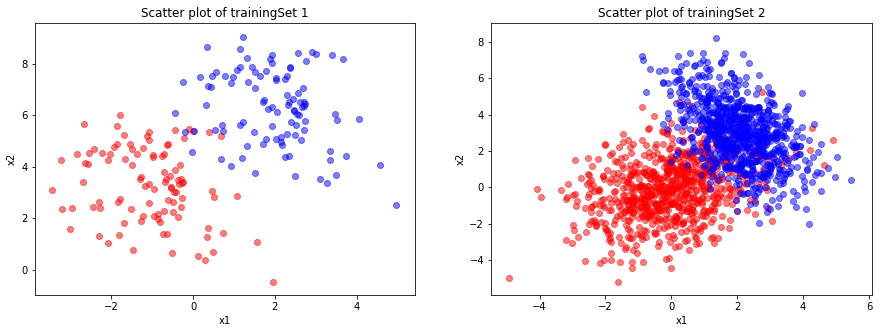

In [256]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
plt.gca().set(title='Scatter plot of trainingSet 1', ylabel='x2', xlabel='x1')
ax1.scatter(df1_class0['x1'], df1_class0['x2'],  alpha=0.5, label='c0', color='r')
ax1.scatter(df1_class1['x1'], df1_class1['x2'],  alpha=0.5, label='c1', color='b')

ax1 = fig.add_subplot(122)
plt.gca().set(title='Scatter plot of trainingSet 2', ylabel='x2', xlabel='x1')
ax1.scatter(df2_class0['x1'], df2_class0['x2'],  alpha=0.5, label='c0', color='r')
ax1.scatter(df2_class1['x1'], df2_class1['x2'],  alpha=0.5, label='c1', color='b')

## Part B: Implement Naive Bayes Classifier

### 1-) Mean-Covariance

In [257]:
print("TRAIN SET 1 - CLASS 0")
print("-----------------------")
print("MEAN",np.mean(df1_class0, axis=0), sep='\n')
print("\nCOV MATRIX:",df1_cov_mtrx0, sep='\n')
print("\nTRAIN SET 1 - CLASS 1")
print("-----------------------")
print("MEAN",np.mean(df1_class1, axis=0), sep='\n')
print("\nCOV MATRIX",df1_cov_mtrx1, sep='\n')
print("\nTRAIN SET 2 - CLASS 0")
print("-----------------------")
print("MEAN",np.mean(df2_class0, axis=0), sep='\n')
print("\nCOV MATRIX",df2_cov_mtrx0, sep='\n')
print("\nTRAIN SET 2 - CLASS 1")
print("-----------------------")
print("MEAN",np.mean(df2_class1, axis=0), sep='\n')
print("\nCOV MATRIX",df2_cov_mtrx1, sep='\n')

TRAIN SET 1 - CLASS 0
-----------------------
MEAN
x1   -1.046247
x2    3.269246
dtype: float64

COV MATRIX:
[[ 1.1470413  -0.37697361]
 [-0.37697361  2.1043151 ]]

TRAIN SET 1 - CLASS 1
-----------------------
MEAN
x1    1.953753
x2    6.269246
dtype: float64

COV MATRIX
[[ 1.1470413  -0.37697361]
 [-0.37697361  2.1043151 ]]

TRAIN SET 2 - CLASS 0
-----------------------
MEAN
x1    0.002465
x2   -0.019716
dtype: float64

COV MATRIX
[[1.92211159 0.85797698]
 [0.85797698 2.83934376]]

TRAIN SET 2 - CLASS 1
-----------------------
MEAN
x1    2.053661
x2    2.977651
dtype: float64

COV MATRIX
[[ 0.99769947 -0.81880324]
 [-0.81880324  2.94962903]]


### 2-) Bayes Fuction

In [258]:
def trainBayes(trainingSamples, trainingLabels):
    train = pd.DataFrame(trainingSamples, columns=['x1','x2']) 
    train_c0 = pd.DataFrame(trainingSamples[trainingLabels == 0], columns=['x1','x2']) 
    train_c1 = pd.DataFrame(trainingSamples[trainingLabels == 1], columns=['x1','x2'])
    
    cov0, cov1 = np.cov(np.transpose(train_c0)), np.cov(np.transpose(train_c1))
    mean0, mean1 = np.mean(train_c0, axis=0), np.mean(train_c1, axis=0)
    
    prior0= np.log(train_c0.size / (train_c0.size + train_c1.size))
    prior1= np.log(train_c1.size / (train_c0.size + train_c1.size))
    
    if  (np.abs(cov0)-np.abs(cov1)).sum()< 1e-14 and not np.array_equal(mean0,mean1):
        g0 = lambda x: -0.5 * np.dot((x-mean0), np.dot(np.linalg.pinv(cov0),np.transpose(x-mean0))) + prior0
        g1 = lambda x: -0.5 * np.dot((x-mean1), np.dot(np.linalg.pinv(cov1),np.transpose(x-mean1))) + prior1
        print("Diff means, equal covs")
    elif np.array_equal(cov0, train_c0.to_numpy().var() * np.identity(cov0.size)) and np.array_equal(cov1,  train_c1.to_numpy().var()*np.identity(cov1.size)):
        g0 = lambda x:  -0.5 * np.dot((x-mean0) ,np.divide(np.transpose(x-mean0) ,train_c0.var()))  + prior0
        g1 = lambda x:  -0.5 * np.dot((x-mean1) ,np.divide(np.transpose(x-mean1) ,train_c1.var()))   + prior1
        print("Covs has constant variances across features")
    else:
        g0 = lambda x: (-0.5 * np.dot(np.dot(np.transpose(x - mean0), np.linalg.pinv(cov0)), x-mean0)) - (0.5 * np.log(np.linalg.det(cov0))) + prior0
        g1 = lambda x: (-0.5 * np.dot(np.dot(np.transpose(x - mean1), np.linalg.pinv(cov1)), x-mean1)) - (0.5 * np.log(np.linalg.det(cov1))) + prior1
        print("General case")
        
    return g0,g1     


### 3-) Error Rates

In [259]:
def Predict(trainx,trainy,testx,testy,classnum):
    g0,g1 = trainBayes(trainx, trainy)
    miss = 0           
    for i in range(testx.shape[0]):
        if g0(np.array(testx[['x1', 'x2']])[i]) > g1(np.array(testx[['x1', 'x2']])[i]):
            prediction = 0
        else:
            prediction = 1
        if prediction != np.array(testy)[i]:
            miss +=1
    print("Error Rate Dataset", classnum," %", miss /testy.size*100)
    return miss /testy.size*100
    
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")

train_x1 = pd.DataFrame(df1, columns=['x1','x2']) 
train_y1 = df1['y']

train_x2 = pd.DataFrame(df2, columns=['x1','x2']) 
train_y2 = df2['y']

test_x1 =  pd.DataFrame(test1, columns=['x1','x2'])
test_y1 =  test1['y']

test_x2 =  pd.DataFrame(test2, columns=['x1','x2'])
test_y2 =  test2['y'] 

err1= Predict(train_x1, train_y1, test_x1, test_y1,1)
err2= Predict(train_x2, train_y2, test_x2, test_y2,2)



Diff means, equal covs
Error Rate Dataset 1  % 2.0
General case
Error Rate Dataset 2  % 11.5


## Part C: Implement K-Fold Cross Validation

### 1-) Combine Trainset and Testset

In [260]:
combined1 = pd.concat([df1, test1], ignore_index=True)
combined2 = pd.concat([df2, test2], ignore_index=True)

### 2-) 5-Fold Cross Validation

In [261]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, random_state=1)

kfold.get_n_splits(combined1)
kfold.get_n_splits(combined2)


5

### 3-) Avarage of testing results

In [262]:
for count,split in enumerate([combined1,combined2],1):
    errors =[]
    for train_index, test_index in kfold.split(split):
        train = split.iloc[train_index]
        test = split.iloc[test_index]
        train_x, train_y =  pd.DataFrame(train, columns=['x1','x2']), train['y'] 
        test_x, test_y = pd.DataFrame(test, columns=['x1','x2']), test['y'] 
        
        err= Predict(train_x, train_y, test_x, test_y,count)
        errors.append(err)
    print("\n**********\nAverage Error Rate %", np.mean(errors),'\n**********\n')


General case
Error Rate Dataset 1  % 1.6666666666666667
Diff means, equal covs
Error Rate Dataset 1  % 3.3333333333333335
Diff means, equal covs
Error Rate Dataset 1  % 6.666666666666667
General case
Error Rate Dataset 1  % 1.6666666666666667
Diff means, equal covs
Error Rate Dataset 1  % 3.3333333333333335

**********
Average Error Rate % 3.3333333333333335 
**********

General case
Error Rate Dataset 2  % 7.75
General case
Error Rate Dataset 2  % 9.0
General case
Error Rate Dataset 2  % 12.0
General case
Error Rate Dataset 2  % 10.75
General case
Error Rate Dataset 2  % 11.5

**********
Average Error Rate % 10.2 
**********



### 4-) Single Split of the Dataset

In [263]:
from random import randint, seed
seed(1)
kfold = KFold(n_splits = randint(1,100))

print('Dataset1 splits:', kfold.get_n_splits(combined1))
print('Dataset2 splits:', kfold.get_n_splits(combined2))

for count,split in enumerate([combined1,combined2],1):
    errors =[]
    for train_index, test_index in kfold.split(split):
        train = split.iloc[train_index]
        test = split.iloc[test_index]
        train_x, train_y =  pd.DataFrame(train, columns=['x1','x2']), train['y'] 
        test_x, test_y = pd.DataFrame(test, columns=['x1','x2']), test['y'] 
        
        err= Predict(train_x, train_y, test_x, test_y,count)
        errors.append(err)
    print("\n**********\nAverage Error Rate %", np.mean(errors),'\n**********\n')


Dataset1 splits: 18
Dataset2 splits: 18
General case
Error Rate Dataset 1  % 5.88235294117647
General case
Error Rate Dataset 1  % 0.0
General case
Error Rate Dataset 1  % 0.0
Diff means, equal covs
Error Rate Dataset 1  % 0.0
General case
Error Rate Dataset 1  % 5.88235294117647
Diff means, equal covs
Error Rate Dataset 1  % 0.0
General case
Error Rate Dataset 1  % 5.88235294117647
Diff means, equal covs
Error Rate Dataset 1  % 11.76470588235294
Diff means, equal covs
Error Rate Dataset 1  % 0.0
Diff means, equal covs
Error Rate Dataset 1  % 5.88235294117647
Diff means, equal covs
Error Rate Dataset 1  % 5.88235294117647
General case
Error Rate Dataset 1  % 0.0
Diff means, equal covs
Error Rate Dataset 1  % 0.0
General case
Error Rate Dataset 1  % 0.0
General case
Error Rate Dataset 1  % 0.0
Diff means, equal covs
Error Rate Dataset 1  % 0.0
Diff means, equal covs
Error Rate Dataset 1  % 6.25
Diff means, equal covs
Error Rate Dataset 1  % 6.25

**********
Average Error Rate % 2.982026

### Interpretation

    While the error rate of dataset 1 increased, error rate of dataset 2 decreased. When we compare dataset 1 with dataset 2, we see that dataset 2's sample count is greater than dataset 1's. Since we will take the average of the error rate of each fold, it can be very risky to apply K-Fold for small numbers of data.

## Part D: Redo the experiments on modified Dataset 2

### 1-) Plot Dataset 2 Modified

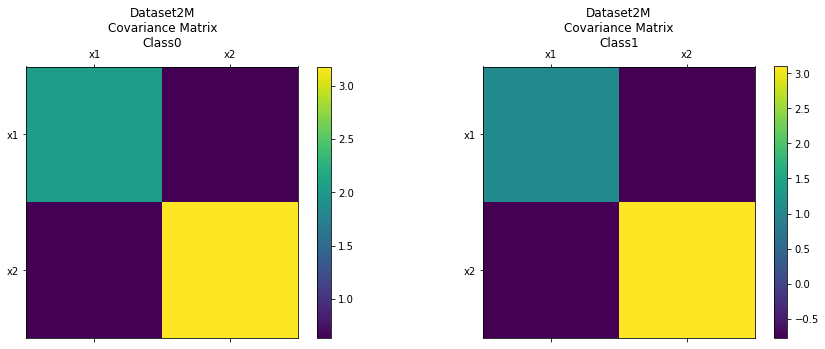

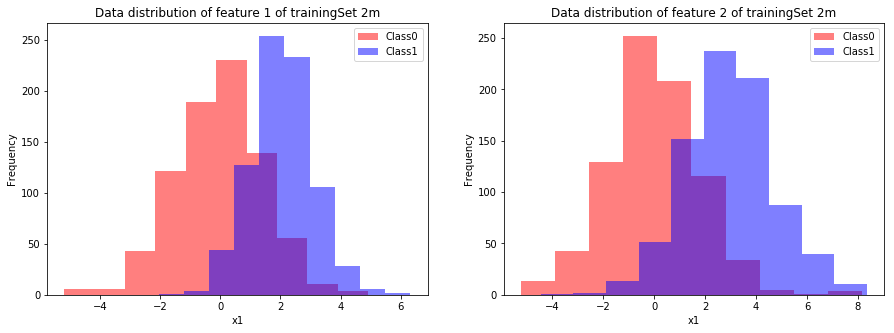

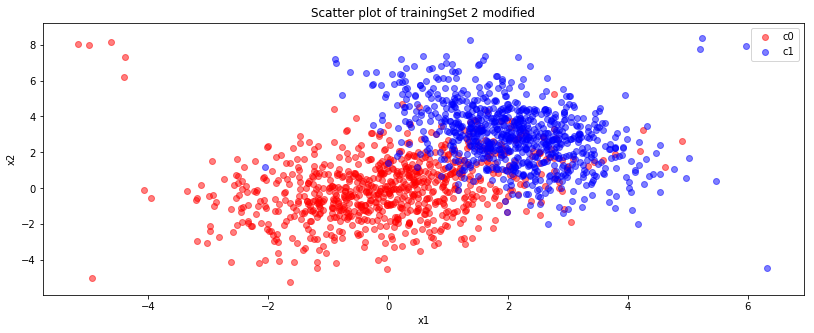

In [264]:
df2m = pd.read_csv("train2_modified.csv") 

df2m_class0 = pd.DataFrame(df2m[df2m['y'] == 0], columns=['x1','x2']) 
df2m_class1 = pd.DataFrame(df2m[df2m['y'] == 1], columns=['x1','x2']) 

df2m_cov_mtrx0 = np.cov(np.transpose(df2m_class0)) 
df2m_cov_mtrx1 = np.cov(np.transpose(df2m_class1))

fig = plt.figure(figsize=(15,5))

alpha = ['x1', 'x2']
ax1_0 = fig.add_subplot(121)
ax1_0.set_title("Dataset2M\nCovariance Matrix\nClass0")
cax = ax1_0.matshow(df2m_cov_mtrx0,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax1_0.set_xticklabels(['']+alpha)
ax1_0.set_yticklabels(['']+alpha)

alpha = ['x1', 'x2']
ax1_1 = fig.add_subplot(122)
ax1_1.set_title("Dataset2M\nCovariance Matrix\nClass1")
cax = ax1_1.matshow(df2m_cov_mtrx1,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax1_1.set_xticklabels(['']+alpha)
ax1_1.set_yticklabels(['']+alpha)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.hist(df2m_class0['x1'], alpha=0.5,  label='Class0', color='r')
ax1.hist(df2m_class1['x1'], alpha=0.5, label='Class1', color='b')
plt.gca().set(title='Data distribution of feature 1 of trainingSet 2m', ylabel='Frequency', xlabel='x1')
ax1.legend(loc='upper right')

ax2 = fig.add_subplot(122)
ax2.hist(df2m_class0['x2'], alpha=0.5,  label='Class0', color='r')
ax2.hist(df2m_class1['x2'], alpha=0.5, label='Class1', color='b')
plt.gca().set(title='Data distribution of feature 2 of trainingSet 2m', ylabel='Frequency', xlabel='x1')
ax2.legend(loc='upper right')

fig = plt.figure(figsize=(30,5))
ax3 = fig.add_subplot(121)
plt.gca().set(title='Scatter plot of trainingSet 2 modified', ylabel='x2', xlabel='x1')
ax3.scatter(df2m_class0['x1'], df2m_class0['x2'],  alpha=0.5, label='c0', color='r')
ax3.scatter(df2m_class1['x1'], df2m_class1['x2'],  alpha=0.5, label='c1', color='b')
ax3.legend(loc='upper right')

### Interpretation

    When we compare dataset 2 modified's and dataset 2's scatter plot, we can see that dataset 2 modified has some outliers.

### 2-) Classification Error

In [265]:
train_x2m = pd.DataFrame(df2m, columns=['x1','x2']) 
train_y2m = df2m['y']
err1= Predict(train_x2m, train_y2m, test_x2, test_y2,'2M')

General case
Error Rate Dataset 2M  % 12.25


### Compare Results

    Dataset 2 has error rate 11.5 and dataset 2 modified has error rate 12.25. The reason for this small increase is that most of the outliers are almost within the confines of their class. Otherwise, if the opposite had happened, we would have faced a high increase.
    When we look at this result, although there are increases in error rate due to outliers, since these increases are small, the bayes classifier algorithm has produced a good error rate despite the outliers.